# Cross-Validation

## 서론
머신러닝은 반복적인 작업이다. 작업을 하다보면 예측을 위해 어떤 변수를 선택할 것인가, 어떤 타입의 모델을 선택할 것인가 등의 문제에 직면하게 된다. 그럴 때마다 validation 세트의 성능을 체크함으로써 데이터 기반의 선택을 했을 것이다.

하지만 위와 같은 접근에는 문제점이 있다. 5000개의 행이 있는 데이터를 상상해보자. 그 중 20%를 validation 세트로 사용한다.(대략 1000개). 이 모델은 1000개의 행에는 적절할 수 있지만 다른 1000개의 데이터에는 부적절할 수도 있다. 일반적으로 많은 양의 validation 세트는 적은 노이즈를 가진다. 많은 양의 validation 세트로 평가된 모델은 더욱 신뢰할 수 있다. 불행하게도 우리는 train 세트를 줄일 수 없으므로 많은 양의 validation 세트를 가지기 힘들다. 그런 문제점을 해결하기 위해 나온 것이 Cross-Validation이다!

## cross-validation이란?

CV에서 우리는 다수의 score(모델 퀄리티 확인하는 지표)를 얻기 위해 다른 서브셋들을 통해 모델링 한다. 예를 들어, 우리는 데이터를 5 조각으로 나눌 수 있다. 각 조각은 데이터의 20%를 차지한다. 이때 우리는 5 'fold'로 나눴다고 한다.

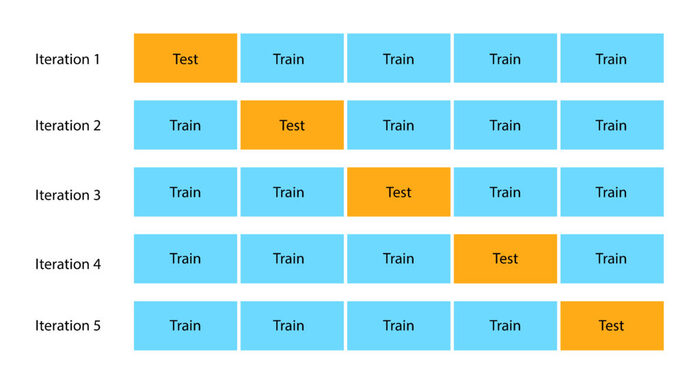

In [1]:
from IPython.display import Image
Image('img/cross validation.jpg')

- iteration 1 : 첫 번째 fold를 validation으로 사용하고, 나머지를 training으로 사용한다. 이를 통해 첫 번째 fold를 validation으로 한 평가를 얻을 수 있다.
- iteration 2 : 두 번째 fold를 validation으로 사용하고, 나머지를 training으로 사용한다. 이를 통해 두 번째 fold를 validation으로 한 평가를 얻을 수 있다.
- 반복.
- 위 작업을 통해 모든 데이터세트에 대해 평가 할 수 있으므로, 편중을 줄이고, 일반화된 모델을 만들 수 있다. 또한 모든 데이터세트를 train에 사용하므로 정확도를 향상시키고, underfitting을 방지할 수 있다.

## 언제 cross-validation을 사용하나요?

CV는 더욱 정확한 모델의 성능을 측정할 수 있게 해준다. 하지만 다수의 모델을 평가해야하므로(또는 하나의 모델을 각 fold에 평가) 수행시간이 길다. 성능과 수행시간이라는 trade-off가 발생한다. 그러므로 아래와 같은 상황일 때 사용하면 좋다.

- 데이터가 적을 때 : 이땐 cv를 한다고 시간이 많이 소요되는 것이 아니다. cv를 하는 것이 좋다.
- 데이터가 많을 때 : single validation 세트가 충분하기 때문에 cv보다는 hold out 방법을 사용을 추천한다.

##  예제
멜버른 집값 데이터를 통해 연습해보자.

In [2]:
import pandas as pd

# 데이터 불러오기
data = pd.read_csv('data/melb_data.csv')

# feature, target 선택
cols_to_use = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']
X = data[cols_to_use]
y = data['Price']

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# pipeline 생성
pipeline = Pipeline([('preprocessor', SimpleImputer()),
                                    ('model', RandomForestRegressor(n_estimators=100, random_state = 0))])

In [4]:
from sklearn.model_selection import cross_val_score

# 평가 척도 MAE, cv 실행
scores = -1 * cross_val_score(pipeline, X, y, cv = 5, scoring = 'neg_mean_absolute_error')

# fold별 score 산출
print('MAE score :', scores)

MAE score : [301030.37999702 301815.50787799 285449.9265583  234645.50725674
 259420.38429285]


In [5]:
# 평균 score
print('Average MAE score (acroos experiments): ')
print(scores.mean())

Average MAE score (acroos experiments): 
276472.34119658044
